<a href="https://colab.research.google.com/github/JakubPac/kurs_ml/blob/main/lasy_losowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
np.random.seed(42)
import plotly.express as px

In [3]:
from sklearn.datasets import load_iris

raw_data = load_iris()

In [4]:
raw_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']
feature_names = all_data['feature_names']
target_names = all_data['target_names']

In [9]:
df = pd.DataFrame(data = np.c_[data, target], columns = feature_names + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [12]:
data = data[:,:2]
target = df['target'].apply(int).values

print(data[:5])
print(target[:5])

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
[0 0 0 0 0]


Las losowy

In [13]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 100, random_state=42)
classifier.fit(data, target)

RandomForestClassifier(random_state=42)

In [14]:
classifier.score(data, target)

0.9266666666666666

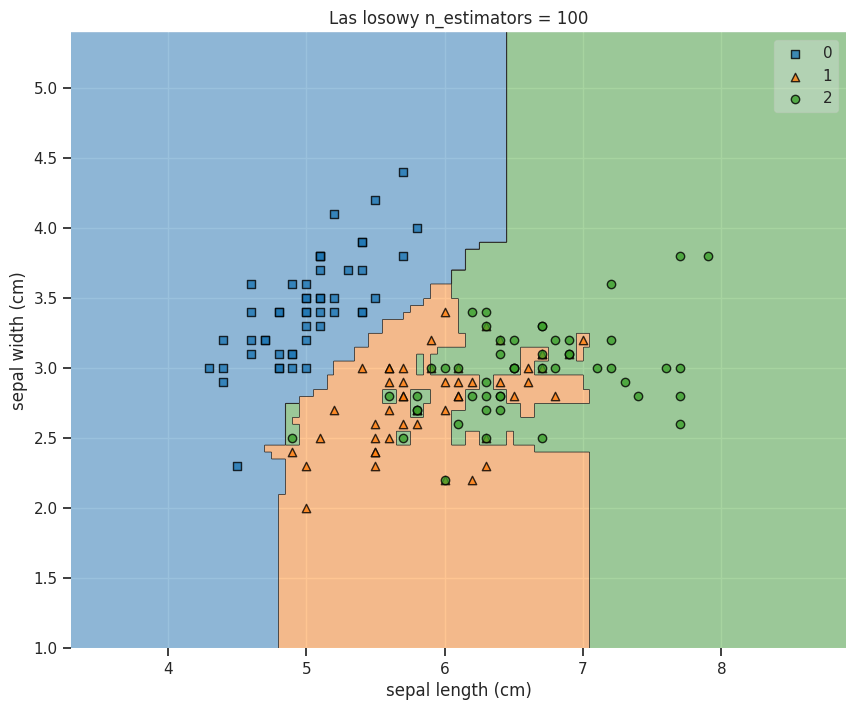

In [15]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(data, target, classifier)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Las losowy n_estimators = 100')
plt.show()

Wszystkie cechy

In [22]:
data = all_data ['data']
targets = all_data['target']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, targets)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [24]:
classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.9736842105263158

In [26]:
classifier.feature_importances_

array([0.1108681 , 0.03437382, 0.44971426, 0.40504382])

In [27]:
features = pd.DataFrame(data = {'features': feature_names, 'feature_importance': classifier.feature_importances_})

px.bar(features, x = 'features', y = 'feature_importance', width = 800, height = 500)